## EDA - 1 (Bike Details)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [4]:
df1=pd.read_csv("BIKE DETAILS.csv")
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
## Question1: What is the range of selling prices in the datasetD

range_value = df1['selling_price'].max() - df1['selling_price'].min()
range_value

np.int64(755000)

In [8]:
## Question2:What is the median selling price for bikes in the datasetD

median_value = df1['selling_price'].median()
median_value

np.float64(45000.0)

In [9]:
## Question 3: What is the most common seller type?

most_common_seller = df1['seller_type'].mode()[0]
most_common_seller


'Individual'

In [10]:
## Question 4: B How many bikes have driven more than 50,000 kilometers?

bikes_above_50000 = df1[df1['km_driven'] > 50000].shape[0]
bikes_above_50000

170

In [12]:
## Question 5: What is the average km_driven value for each ownership type?

average_km_by_owner = df1.groupby('owner')['km_driven'].mean().reset_index()
average_km_by_owner.columns = ['ownership', 'average_km_driven']
average_km_by_owner

,ownership,average_km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


In [13]:
## Question 6: What proportion of bikes are from the year 2015 or older?

proportion_2015_or_older = (df1[df1['year'] <= 2015].shape[0] / df1.shape[0]) * 100
proportion_2015_or_older

56.64467483506126

In [15]:
## Question 7:  What is the trend of missing values across the dataset?

missing_values = df1.isnull().sum()
missing_values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [17]:
## Question 8: What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom_price = df1.loc[df1['ex_showroom_price'].idxmax()]
highest_ex_showroom_price

name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object

In [18]:
## Question 9: What is the total number of bikes listed by each seller type?

total_bikes_by_seller = df1['seller_type'].value_counts().reset_index()
total_bikes_by_seller.columns = ['seller_type', 'total_bikes']  
total_bikes_by_seller

,seller_type,total_bikes
0,Individual,1055
1,Dealer,6


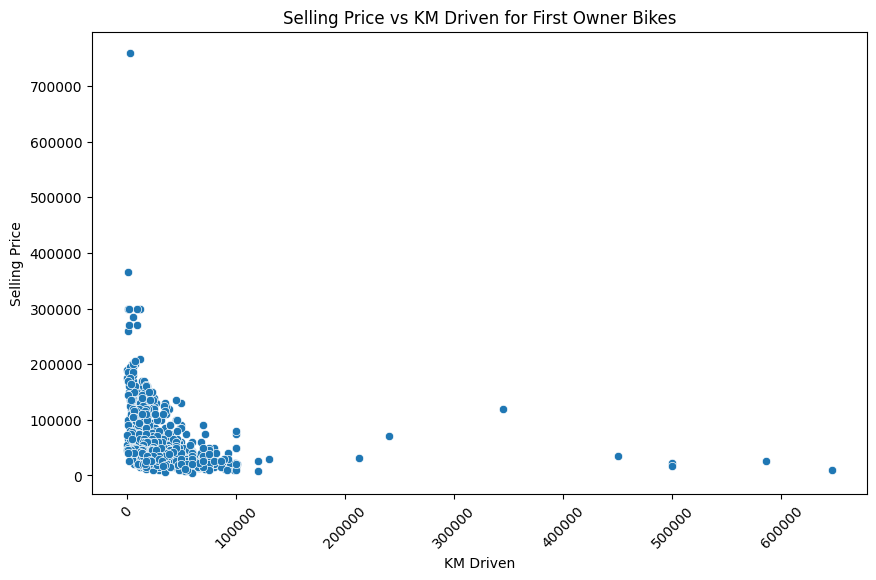

In [26]:
## Question 10:What is the relationship between selling_price and km_driven for first-owner bikes?

first_owner_bikes = df1[df1['owner'] == '1st owner']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_bikes, x='km_driven', y='selling_price', palette='viridis')
plt.xticks(rotation=45)
plt.title('Selling Price vs KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price')
plt.show()


In [29]:
## Question 11: Identify and remove outliers in the km_driven column using the IQR method?

Q1 = df1['km_driven'].quantile(0.25)
Q3 = df1['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datasetD_no_outliers = df1[(df1['km_driven'] >= lower_bound) & (df1['km_driven'] <= upper_bound)]
datasetD_no_outliers





,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


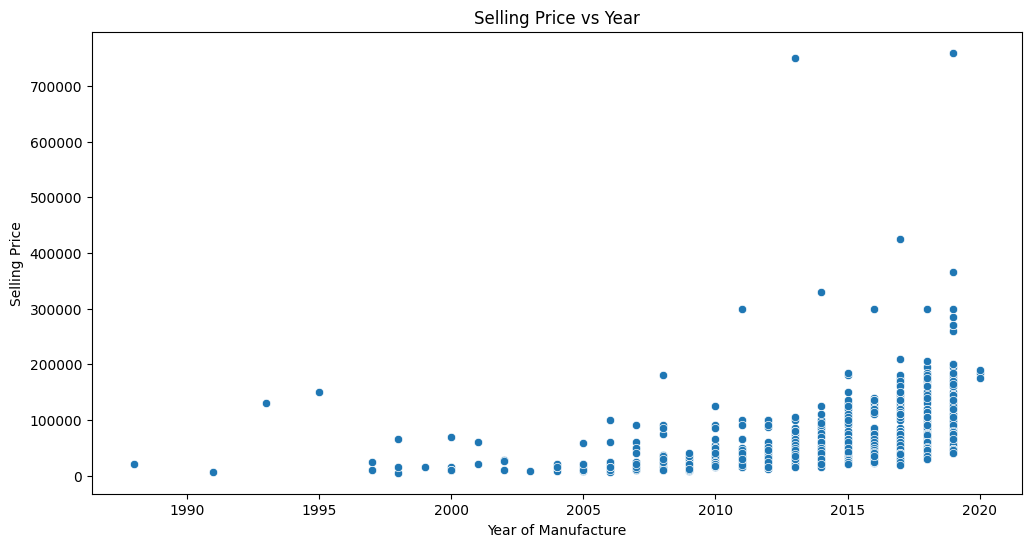

In [30]:
## Question 12: B Perform a bivariate analysis to visualize the relationship between year and selling_price

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df1, x='year', y='selling_price')
plt.title('Selling Price vs Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()

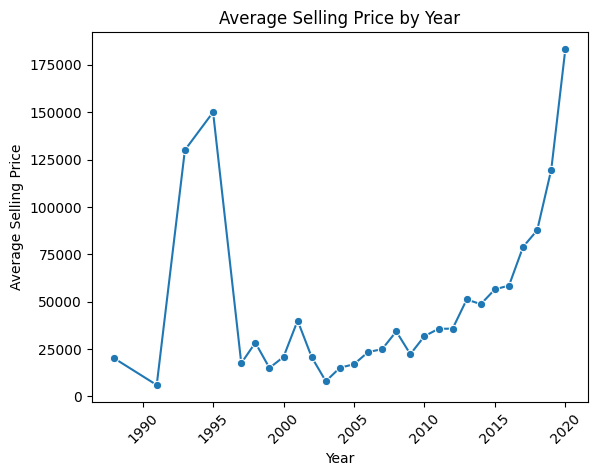

In [31]:
avg_price_by_year = df1.groupby('year')['selling_price'].mean().reset_index()

sns.lineplot(data=avg_price_by_year, x='year', y='selling_price', marker='o')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

In [38]:
## Question 13:What is the average depreciation in selling price based on the bike's age (current year-manufacturingyear)?

from datetime import datetime

current_year = datetime.now().year
df1['age'] = current_year - df1['year']

avg_price_by_age = df1.groupby('age')['selling_price'].mean().reset_index()

avg_price_by_age['depreciation'] = avg_price_by_age['selling_price'].diff(-1)

avg_price_by_age


,age,selling_price,depreciation
0,5,183333.333333,63643.821705
1,6,119689.511628,32029.137582
2,7,87660.374046,8765.637204
3,8,78894.736842,20425.718151
4,9,58469.018692,1969.018692
5,10,56500.000000,7831.868132
6,11,48668.131868,-2468.854433
7,12,51136.986301,15388.586301
8,13,35748.400000,92.678689
9,14,35655.721311,3862.387978


In [43]:
## Question 14:  Which bike names are priced significantly above the average price for their manufacturing year?

avg_price_by_year = df1.groupby('year')['selling_price'].mean().reset_index()
avg_price_by_year.columns = ['year', 'average_selling_price']
avg_price_by_year

merged = df1.merge(avg_price_by_year, on='year', how='left')
threshold = 1.20

above_avg_bikes = merged[merged['selling_price'] > threshold * merged['average_selling_price']]

result = above_avg_bikes[['name', 'year', 'selling_price', 'average_selling_price']].drop_duplicates()

result

,name,year,selling_price,average_selling_price
0,Royal Enfield Classic 350,2019,175000,119689.511628
2,Royal Enfield Classic Gunmetal Grey,2018,150000,87660.374046
7,Royal Enfield Bullet 350 [2007-2011],2008,180000,34289.285714
13,Yamaha YZF R3,2019,365000,119689.511628
17,Yamaha YZF R15 S,2010,40000,31793.333333
...,...,...,...,...
984,Royal Enfield Classic 500,2014,95000,48668.131868
985,Royal Enfield Classic 500,2011,90000,35655.721311
1005,TVS Apache RTR 160,2014,60000,48668.131868
1008,Bajaj Pulsar 220 F,2012,52000,35748.400000


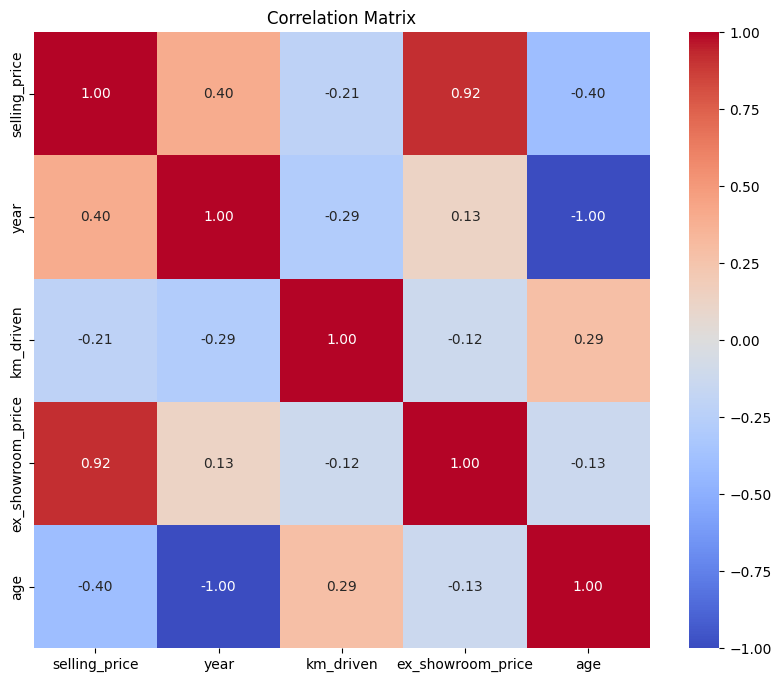

In [45]:
## Question 15: Develop a correlation matrix for numeric columns and visualize it using a heatmap.

numeric_df = df1.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


## EDA-2

In [56]:
df2=pd.read_csv("Car Sale.csv")

df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [61]:
df2.dropna(subset=['Customer Name'], inplace=True)

In [60]:
df2.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [65]:
## Question1:  What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_price_by_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
average_price_by_dealer.columns = ['Dealer Name', 'Average Selling Price']
average_price_by_dealer.sort_values(by='Average Selling Price', ascending=False, inplace=True)
average_price_by_dealer


,Dealer Name,Average Selling Price
27,U-Haul CO,28769.919006
5,Classic Chevy,28602.014446
19,Rabun Used Car Sales,28527.536177
11,Iceberg Rentals,28522.958533
8,Enterprise Rent A Car,28312.580800
23,Scrivener Performance Engineering,28297.371589
9,Gartner Buick Hyundai Saab,28247.621019
2,Capitol KIA,28189.703822
22,Saab-Belle Dodge,28176.692000
20,Race Car Help,28163.372706


In [66]:
## Question 2:Which car brand(Company)has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation_by_brand = df2.groupby('Company')['Price ($)'].std().reset_index()
price_variation_by_brand.columns = ['Company', 'Price Variation']
price_variation_by_brand.sort_values(by='Price Variation', ascending=False, inplace=True)
price_variation_by_brand


,Company,Price Variation
15,Lincoln,19658.050211
24,Saab,19653.740089
4,Cadillac,19517.120220
21,Plymouth,19065.997338
14,Lexus,17852.923492
3,Buick,17142.232626
17,Mercury,16445.172195
19,Nissan,16214.264017
25,Saturn,15990.223671
8,Ford,15849.090227


In [67]:
## Question 3: What is the distribution of car prices for each transmission type, and how do the IQR compare?

transmission_price_distribution = df2.groupby('Transmission')['Price ($)'].describe().reset_index()
transmission_price_distribution.columns = ['Transmission', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
transmission_price_distribution

,Transmission,Count,Mean,Std,Min,25%,50%,75%,Max
0,Auto,12570.0,28247.193317,13746.805377,1200.0,19000.0,24000.0,35500.0,75700.0
1,Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [69]:
## Question 4:What is the distribution of car prices across different regions?

region_price_distribution = df2.groupby('Dealer_Region')['Price ($)'].describe().reset_index()
region_price_distribution.columns = ['Region', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
region_price_distribution

,Region,Count,Mean,Std,Min,25%,50%,75%,Max
0,Aurora,3129.0,28329.300735,15025.653685,9000.0,18001.0,23000.0,35000.0,85800.0
1,Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
2,Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
3,Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
4,Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
5,Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
6,Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [71]:
## Question 5:What is the distribution of cars based on body styles?

body_style_distribution = df2['Body Style'].value_counts().reset_index()
body_style_distribution.columns = ['Body Style', 'Count']
body_style_distribution.sort_values(by='Count', ascending=False, inplace=True)
body_style_distribution

,Body Style,Count
0,SUV,6374
1,Hatchback,6128
2,Sedan,4488
3,Passenger,3945
4,Hardtop,2970


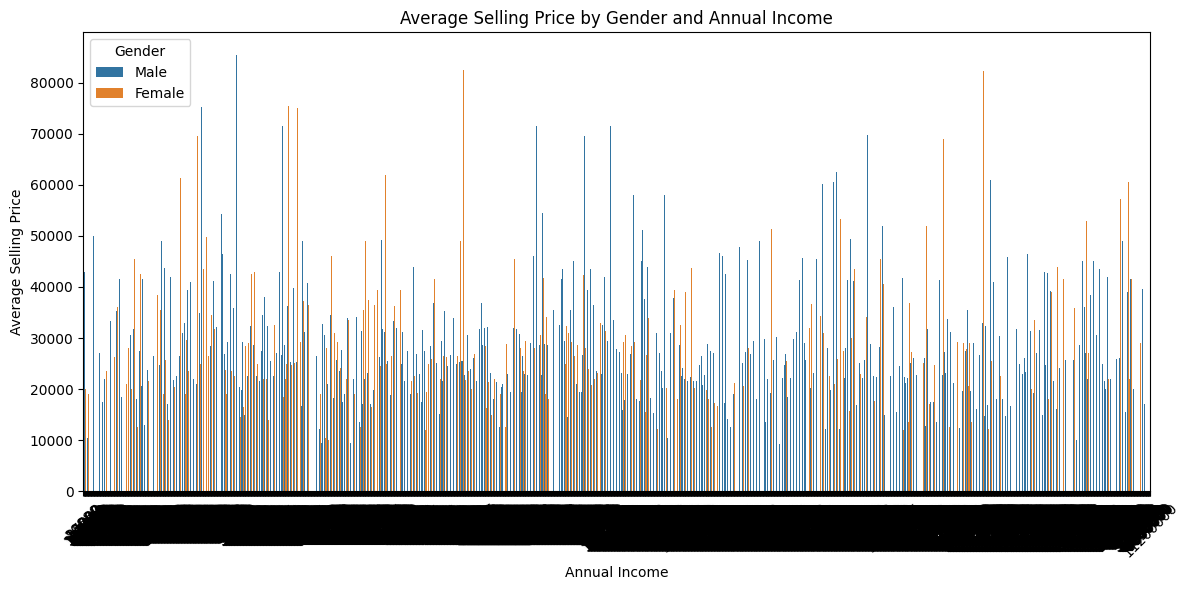

In [ ]:
## Question 6: How does the average selling price of cars vary by customer gender and annual income?

avg_price_by_gender_income = df2.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index() 
avg_price_by_gender_income

plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_price_by_gender_income,
    x='Annual Income',
    y='Price ($)',
    hue='Gender'
)

plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [77]:
## Question 7:  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

region_price_distribution = df2.groupby('Dealer_Region')['Price ($)'].describe().reset_index()
region_price_distribution.columns = ['Region', 'Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']   
region_price_distribution.sort_values(by='Mean', ascending=False, inplace=True)
region_price_distribution

,Region,Count,Mean,Std,Min,25%,50%,75%,Max
1,Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
0,Aurora,3129.0,28329.300735,15025.653685,9000.0,18001.0,23000.0,35000.0,85800.0
2,Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
5,Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
6,Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0
4,Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
3,Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0


In [79]:
## Question 8:How does the average car price differ between cars with different engine sizes?

avg_price_by_engine = df2.groupby('Engine')['Price ($)'].mean().reset_index()
avg_price_by_engine.columns = ['Engine', 'Average Price']
avg_price_by_engine.sort_values(by='Average Price', ascending=False, inplace=True)
avg_price_by_engine

,Engine,Average Price
0,DoubleÂ Overhead Camshaft,28247.193317
1,Overhead Camshaft,27914.710631


In [ ]:
## Question 9:How do car prices vary based on the customer’s annual income bracket?

income_brackets = pd.cut(df2['Annual Income'], bins=[0, 30000, 60000, 90000, 120000, np.inf], labels=['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k'])
df2['Income Bracket'] = income_brackets
avg_price_by_income_bracket = df2.groupby('Income Bracket')['Price ($)'].mean().reset_index()
avg_price_by_income_bracket.columns = ['Income Bracket', 'Average Price']
avg_price_by_income_bracket.sort_values(by='Average Price', ascending=False, inplace=True)
avg_price_by_income_bracket


,Income Bracket,Average Price
3,90k-120k,46001.000000
2,60k-90k,43000.000000
4,>120k,28145.898271
0,<30k,27884.297820
1,30k-60k,NaN


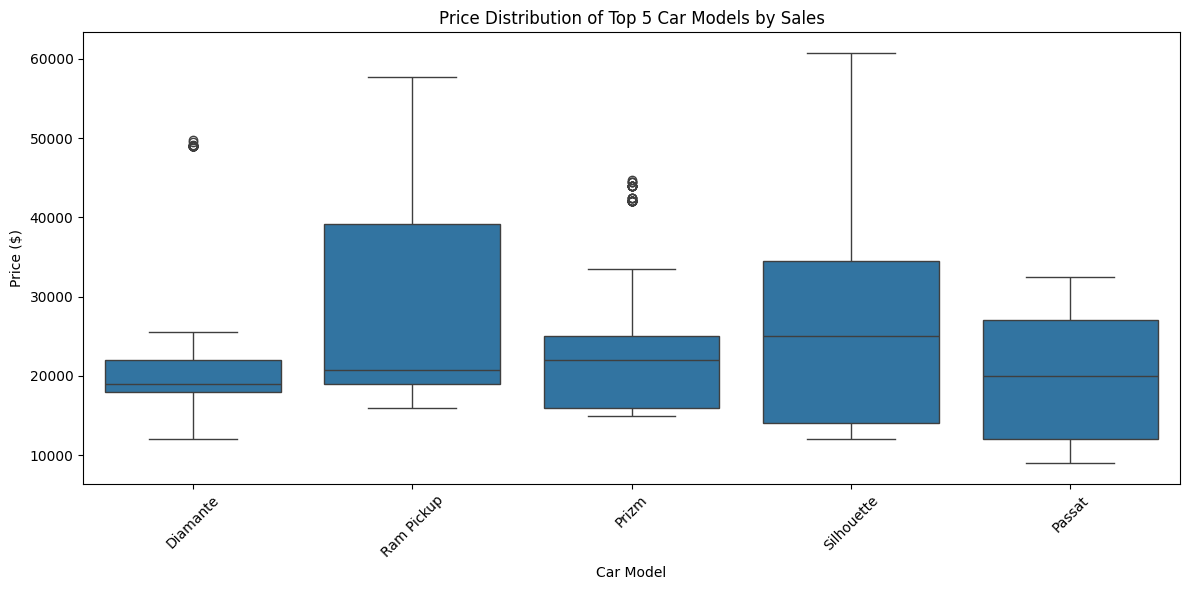

In [83]:
## Question 10:What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models = df2['Model'].value_counts().head(5).index
top_5_sales = df2[df2['Model'].isin(top_5_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_sales, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


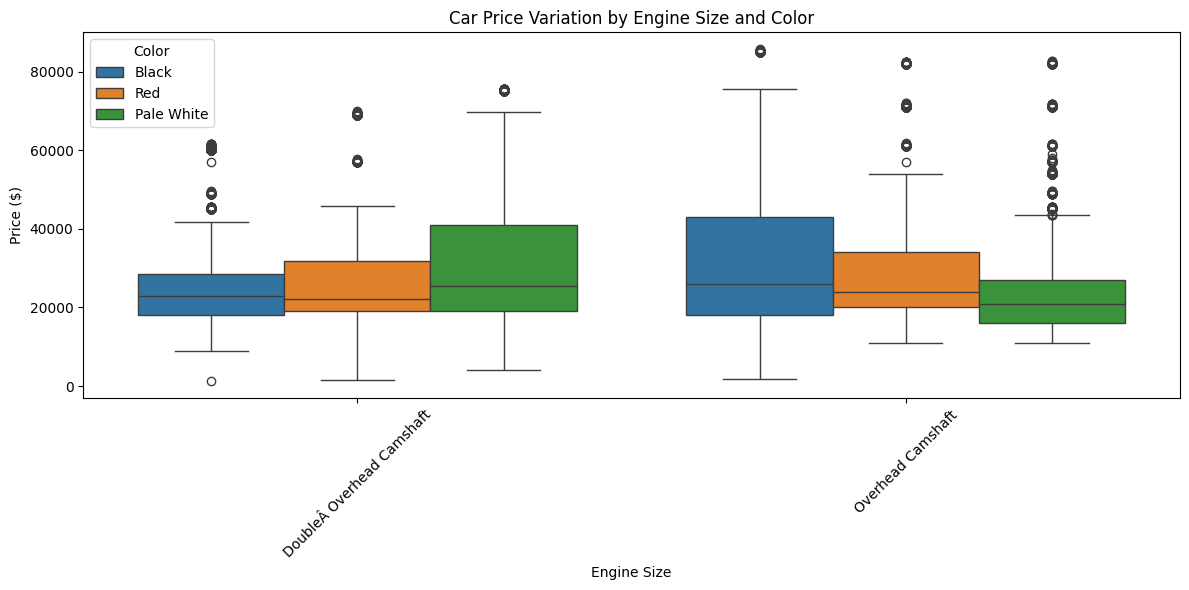

In [84]:
## Question 11:How does car price vary with engine size across different car colors, and which colors have thehighest pricevariation?

plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='Engine', y='Price ($)', hue='Color')
plt.title('Car Price Variation by Engine Size and Color')

plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.tight_layout()
plt.show()

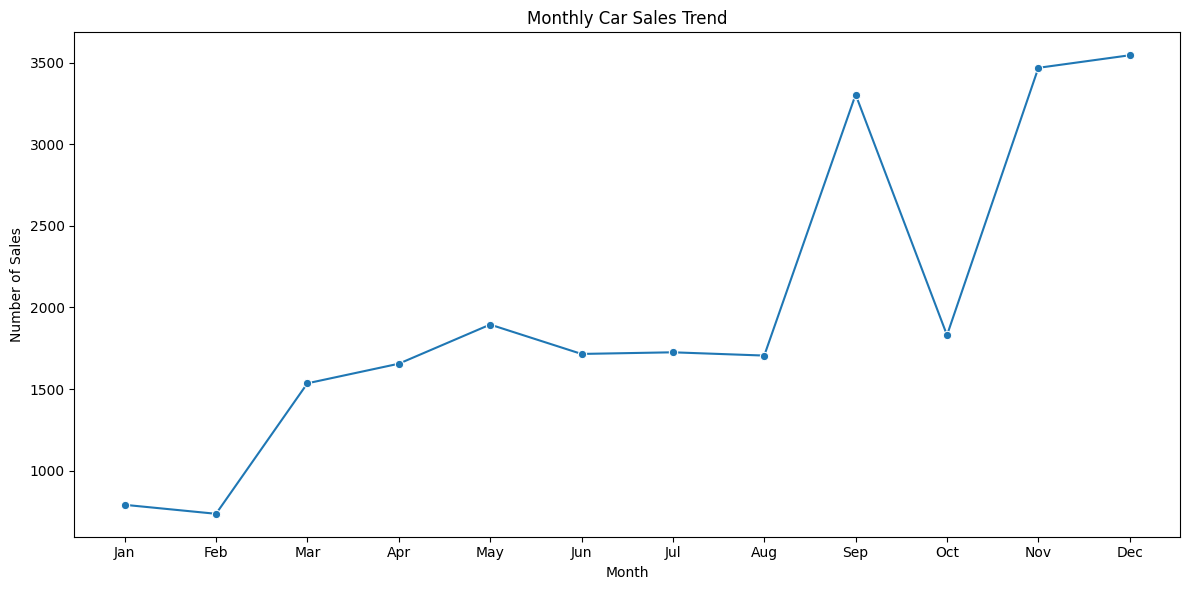

In [87]:
## Question 12:Is there any seasonal trend in car sales based on the date of sale?

df2['Sale Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Sale Date'].dt.month
monthly_sales = df2.groupby('Month')['Price ($)'].count().reset_index()
monthly_sales.columns = ['Month', 'Number of Sales']

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Number of Sales', marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

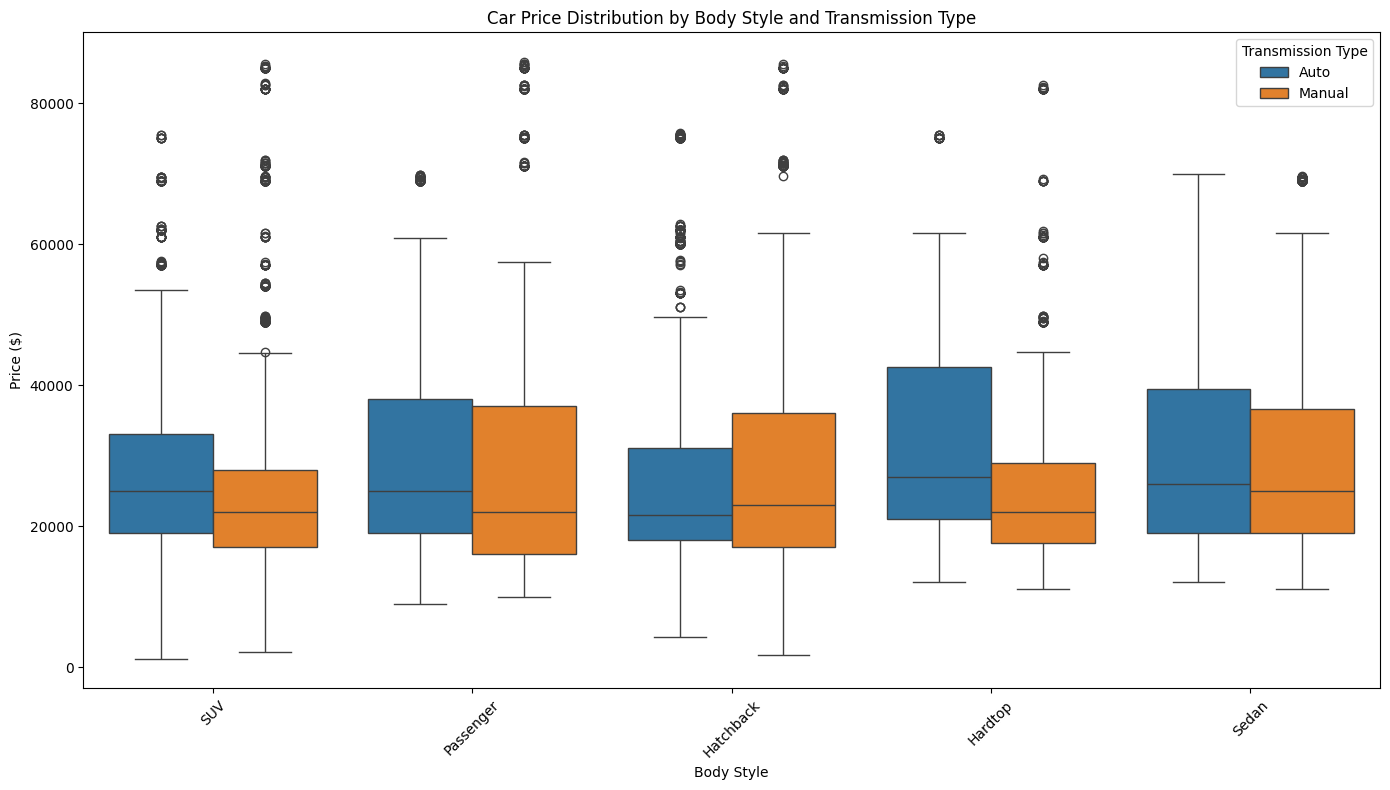

In [88]:
## Question 13:How does the car price distribution change when considering different combinations of body style and
#transmission type?

plt.figure(figsize=(14, 8))
sns.boxplot(data=df2, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()

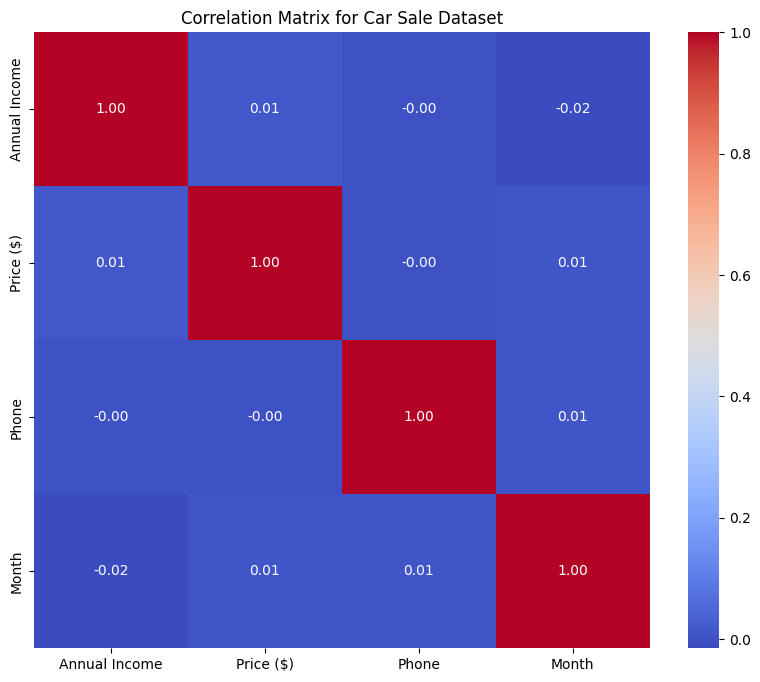

In [89]:
## Question 14:What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact?
numeric_df2 = df2.select_dtypes(include=['number'])
correlation_matrix2 = numeric_df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Car Sale Dataset')
plt.show()

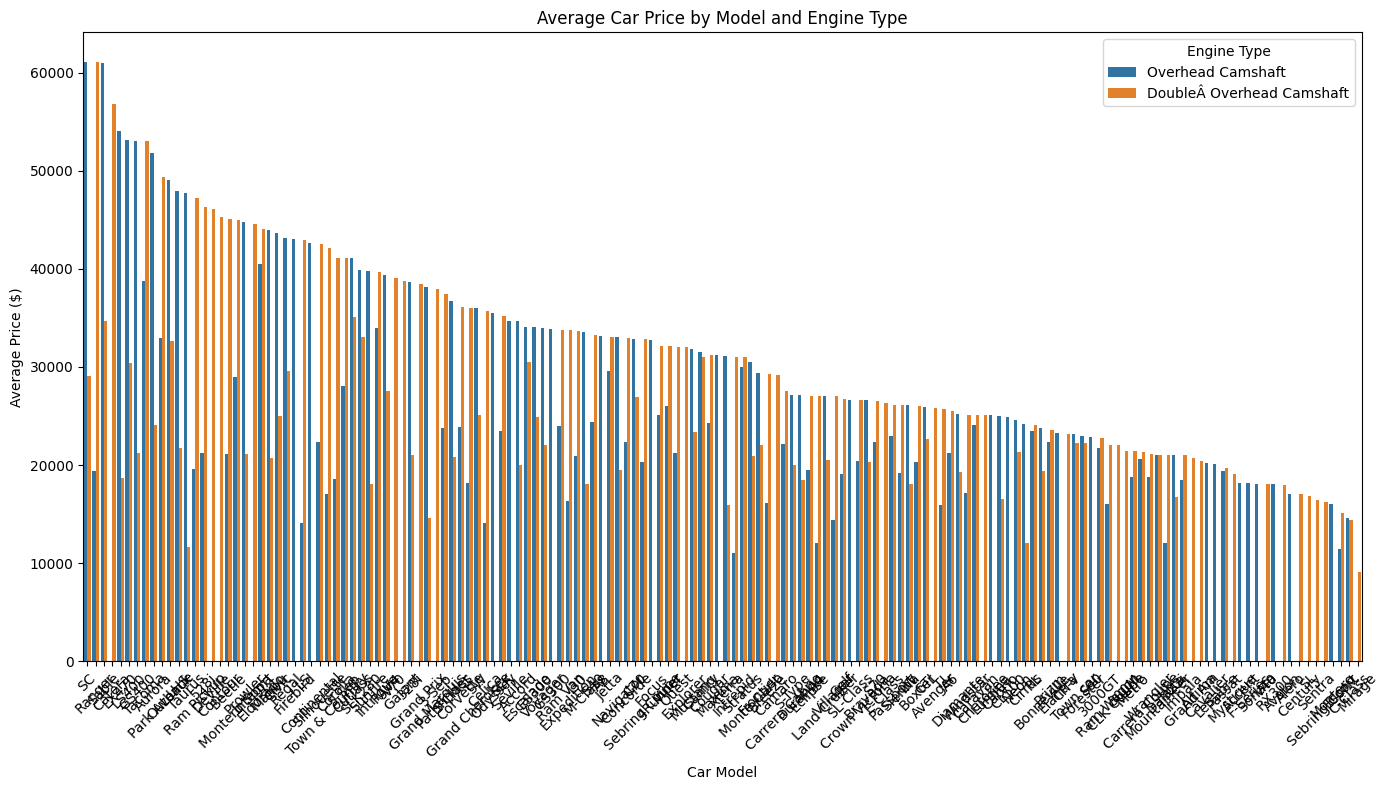

In [92]:
## Question 15: How does the average car price vary across different car models and engine types?

avg_price_by_model_engine = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
avg_price_by_model_engine.columns = ['Model', 'Engine', 'Average Price']

avg_price_by_model_engine.sort_values(by='Average Price', ascending=False, inplace=True)
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_price_by_model_engine, x='Model', y='Average Price', hue='Engine')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')

plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.tight_layout()
plt.show()


## EDA-3

In [151]:
df3=pd.read_csv("amazon.csv")
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [150]:
df3.rating

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64

In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   object 
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [145]:
df3.rating.isnull().sum()

np.int64(0)

In [ ]:
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce').astype(float)


df3.actual_price=df3.actual_price.str.replace('₹', '').str.replace(',', '').astype(float)


In [162]:
df3['discounted_price'] = df3['discounted_price'].astype(str) \
    .str.replace('₹', '', regex=False) \
    .str.replace(',', '', regex=False) \
    .astype(float)

In [163]:
df3.discount_percentage=df3.discount_percentage.str.replace('%', '').astype(float)

In [166]:
df3.rating_count=df3.rating_count.str.replace(',', '').astype(float)

In [167]:
## Question 1:What is the average rating for each product categoryk

average_rating_by_category = df3.groupby('category')['rating'].mean().reset_index()
average_rating_by_category.columns = ['Category', 'Average Rating']
average_rating_by_category.sort_values(by='Average Rating', ascending=False, inplace=True)
average_rating_by_category

,Category,Average Rating
57,Computers&Accessories|Tablets,4.6
48,Computers&Accessories|NetworkingDevices|Networ...,4.5
62,Electronics|Cameras&Photography|Accessories|Film,4.5
38,Computers&Accessories|Components|Memory,4.5
81,Electronics|HomeAudio|MediaStreamingDevices|St...,4.5
...,...,...
3,Computers&Accessories|Accessories&Peripherals|...,3.6
88,"Electronics|HomeTheater,TV&Video|Accessories|3...",3.5
2,Computers&Accessories|Accessories&Peripherals|...,3.5
14,Computers&Accessories|Accessories&Peripherals|...,3.4


In [168]:
## Question 2:What are the top rating_count products by category

top_rating_count_by_category = df3.groupby('category')['rating_count'].max().reset_index()
top_rating_count_by_category.columns = ['Category', 'Top Rating Count']
top_rating_count_by_category.sort_values(by='Top Rating Count', ascending=False, inplace=True)
top_rating_count_by_category

,Category,Top Rating Count
89,"Electronics|HomeTheater,TV&Video|Accessories|C...",426973.0
76,"Electronics|Headphones,Earbuds&Accessories|Hea...",363713.0
117,Electronics|Mobiles&Accessories|Smartphones&Ba...,313836.0
145,Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...,270563.0
42,Computers&Accessories|ExternalDevices&DataStor...,253105.0
...,...,...
36,Computers&Accessories|Components|InternalHardD...,362.0
43,Computers&Accessories|Laptops|TraditionalLaptops,323.0
106,Electronics|Mobiles&Accessories|MobileAccessor...,305.0
86,Electronics|HomeAudio|Speakers|TowerSpeakers,282.0


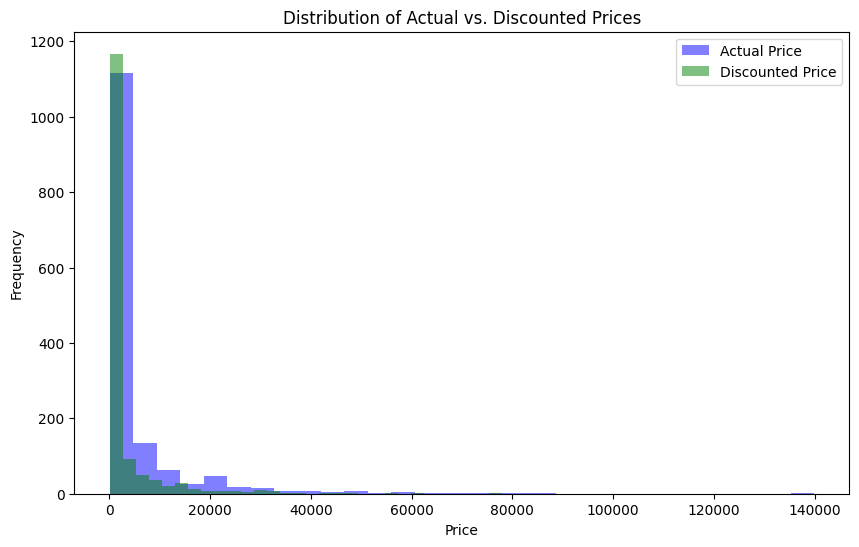

In [170]:
## Question 3:' What is the distribution of discounted prices vs. actual prices


plt.figure(figsize=(10, 6))
plt.hist(df3['actual_price'], bins=30, alpha=0.5, label='Actual Price', color='blue')
plt.hist(df3['discounted_price'], bins=30, alpha=0.5, label='Discounted Price', color='green')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Discounted Prices')
plt.legend()
plt.show()

In [171]:
## Question 4:How does the average discount percentage vary across categoriesk

average_discount_by_category = df3.groupby('category')['discount_percentage'].mean().reset_index()
average_discount_by_category.columns = ['Category', 'Average Discount Percentage']
average_discount_by_category.sort_values(by='Average Discount Percentage', ascending=False, inplace=True)
average_discount_by_category

,Category,Average Discount Percentage
6,Computers&Accessories|Accessories&Peripherals|...,90.0
75,"Electronics|Headphones,Earbuds&Accessories|Ear...",90.0
106,Electronics|Mobiles&Accessories|MobileAccessor...,90.0
73,"Electronics|Headphones,Earbuds&Accessories|Ada...",88.0
14,Computers&Accessories|Accessories&Peripherals|...,87.5
...,...,...
197,OfficeProducts|OfficeElectronics|Calculators|F...,0.0
199,OfficeProducts|OfficePaperProducts|Paper|Copy&...,0.0
205,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,0.0


In [172]:
## Quesrtion 5:  What are the most popular product namesk

top_product_names = df3['product_name'].value_counts().head(10).reset_index()
top_product_names.columns = ['Product Name', 'Count']
top_product_names.sort_values(by='Count', ascending=False, inplace=True)
top_product_names


,Product Name,Count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Flix Micro Usb Cable For Smartphone (Black),3
3,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",3
4,Portronics Konnect CL 20W POR-1067 Type-C to 8...,3
5,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,3
6,MI Braided USB Type-C Cable for Charging Adapt...,3
7,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,3
8,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,3
9,Pinnaclz Original Combo of 2 Micro USB Fast Ch...,3


In [174]:
## Question 6: What are the most popular product keywordss
top_keywords = df3['product_name'].value_counts().head(10).reset_index()
top_keywords.columns = ['Product Keywords', 'Count']
top_keywords.sort_values(by='Count', ascending=False, inplace=True)
top_keywords


,Product Keywords,Count
0,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
1,Fire-Boltt Phoenix Smart Watch with Bluetooth ...,4
2,Flix Micro Usb Cable For Smartphone (Black),3
3,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",3
4,Portronics Konnect CL 20W POR-1067 Type-C to 8...,3
5,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,3
6,MI Braided USB Type-C Cable for Charging Adapt...,3
7,Ambrane 2 in 1 Type-C & Micro USB Cable with 6...,3
8,Amazon Basics USB Type-C to USB-A 2.0 Male Fas...,3
9,Pinnaclz Original Combo of 2 Micro USB Fast Ch...,3


In [176]:
## Question 7:What are the most popular product reviews?
top_reviews = df3['review_title'].value_counts().head(10).reset_index()
top_reviews.columns = ['Review', 'Count']
top_reviews.sort_values(by='Count', ascending=False, inplace=True)
top_reviews

,Review,Count
0,"Worked on iPhone 7 and didn’t work on XR,Good ...",10
1,"Phone, camera, heating - works for me, may not...",8
2,"Satisfied,Charging is really fast,Value for mo...",8
3,"A Good Braided Cable for Your Type C Device,Go...",7
4,"Good product,Good one,Nice,Really nice product...",7
5,"Fake Product,Costly but excellent quality,Stor...",6
6,"Above average phone,Worth For The Money 💰,Okie...",6
7,"Not Polished Enough. (Improving with updates),...",5
8,"GOOD,Thank you Amazon very good charging cabl...",5
9,"Worth the money,Good smart watch,the screen do...",5


In [177]:
## Question 8: What is the correlation between discounted_price and rating?
correlation_discounted_rating = df3[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"Correlation between discounted price and rating: {correlation_discounted_rating:.2f}")



Correlation between discounted price and rating: 0.12


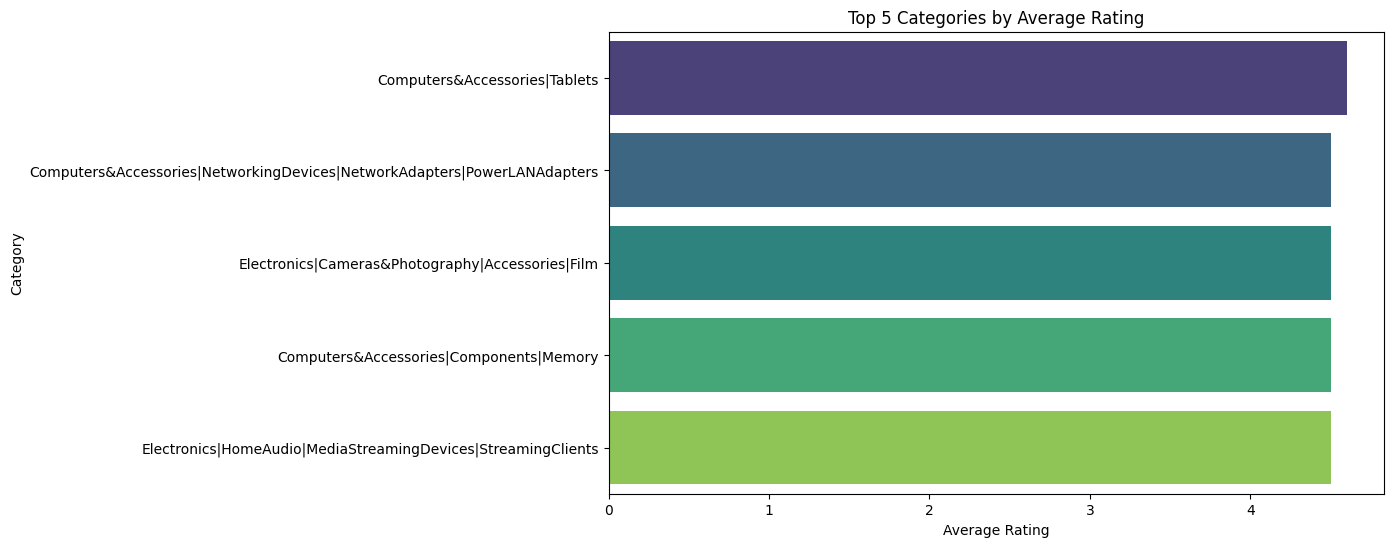

In [178]:
## Question 9: What are the Top 5 categories based on the highest ratings
top_categories_by_rating = df3.groupby('category')['rating'].mean().reset_index()
top_categories_by_rating.columns = ['Category', 'Average Rating']
top_categories_by_rating.sort_values(by='Average Rating', ascending=False, inplace=True)
top_categories_by_rating = top_categories_by_rating.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories_by_rating, x='Average Rating', y='Category', palette='viridis')
plt.title('Top 5 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()